### Imports!

In [5]:
from glob import glob
import os
import json
from scipy.signal import find_peaks, find_peaks_cwt
import matplotlib.pyplot as plt
import numpy as np

### Load the latest funscript file from predictions

In [6]:
files = glob('predictions/*.funscript')
files = [file for file in files if 'postprocessed' not in file]
file = files[-1]
print(file)
json_data = json.load(open(file))
actions = json_data['actions']
pos = []
for action in actions:
    pos.append(action['pos'])
pos = np.array(pos)

predictions/milfvr-gobble-squabble-180_180x180_3dh_LR.mp4.20231125-012514.funscript


### Visualize distance and prominence variable impact on output

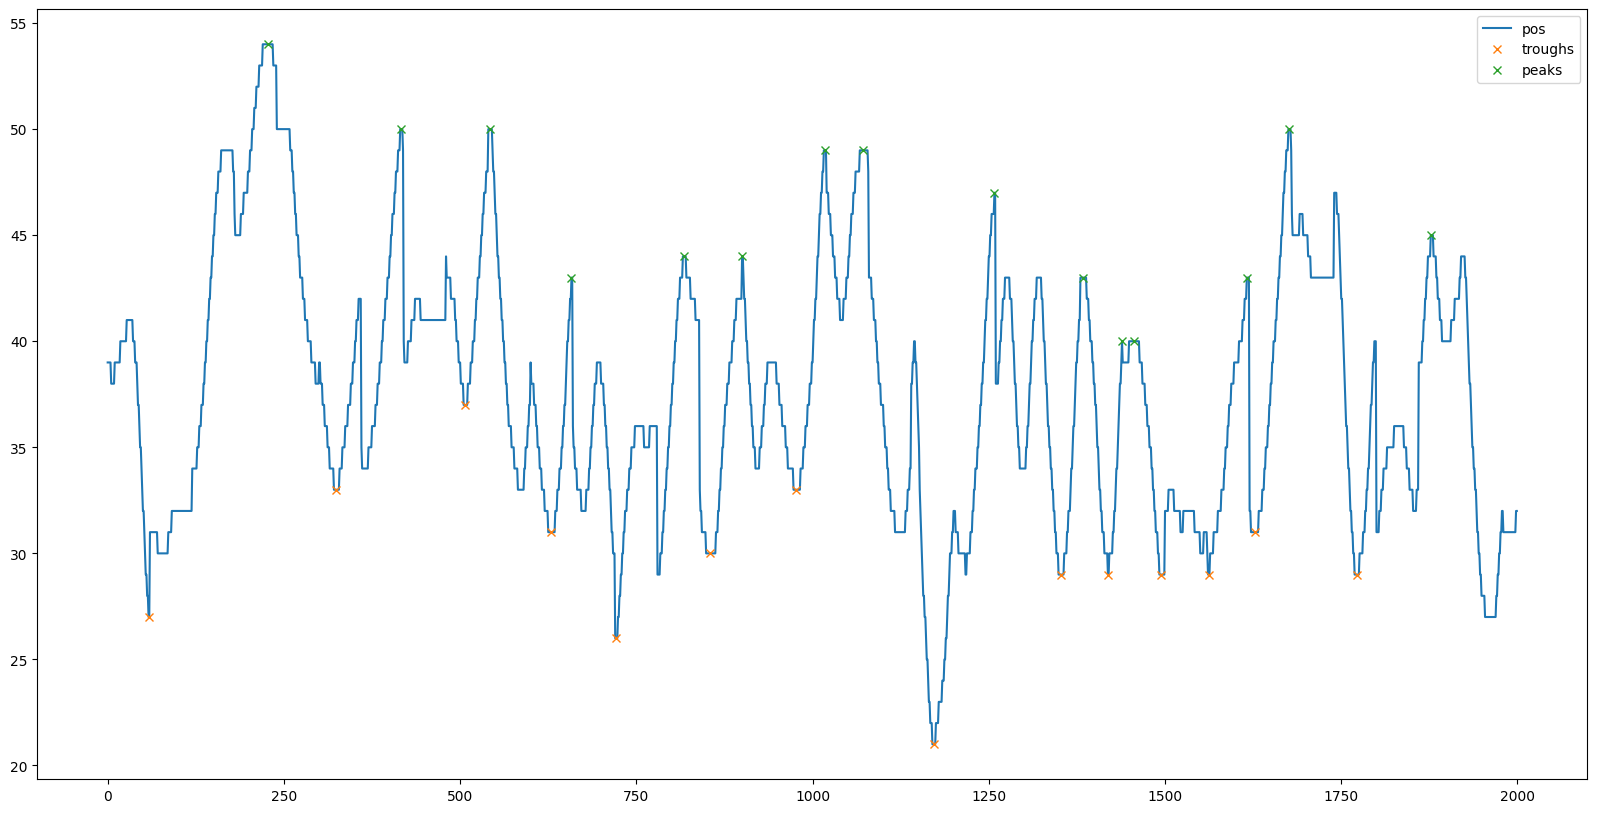

In [7]:
start = 0
finish = 2000
distance = 10
prominence = 10

peaks, _ = find_peaks(pos[start:finish], distance=distance, prominence=prominence)
pos_inverted = 100 - pos
troughs, _ = find_peaks(pos_inverted[start:finish], distance=distance, prominence=prominence)
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(pos[start:finish])
plt.plot(troughs, pos[troughs], 'x')
plt.plot(peaks, pos[peaks], 'x')
plt.legend(['pos', 'troughs', 'peaks'])
plt.show()

### Put it all together and make a new funscript file from the peaks

predictions/milfvr-gobble-squabble-180_180x180_3dh_LR.mp4.crop.20231125-012514.funscript


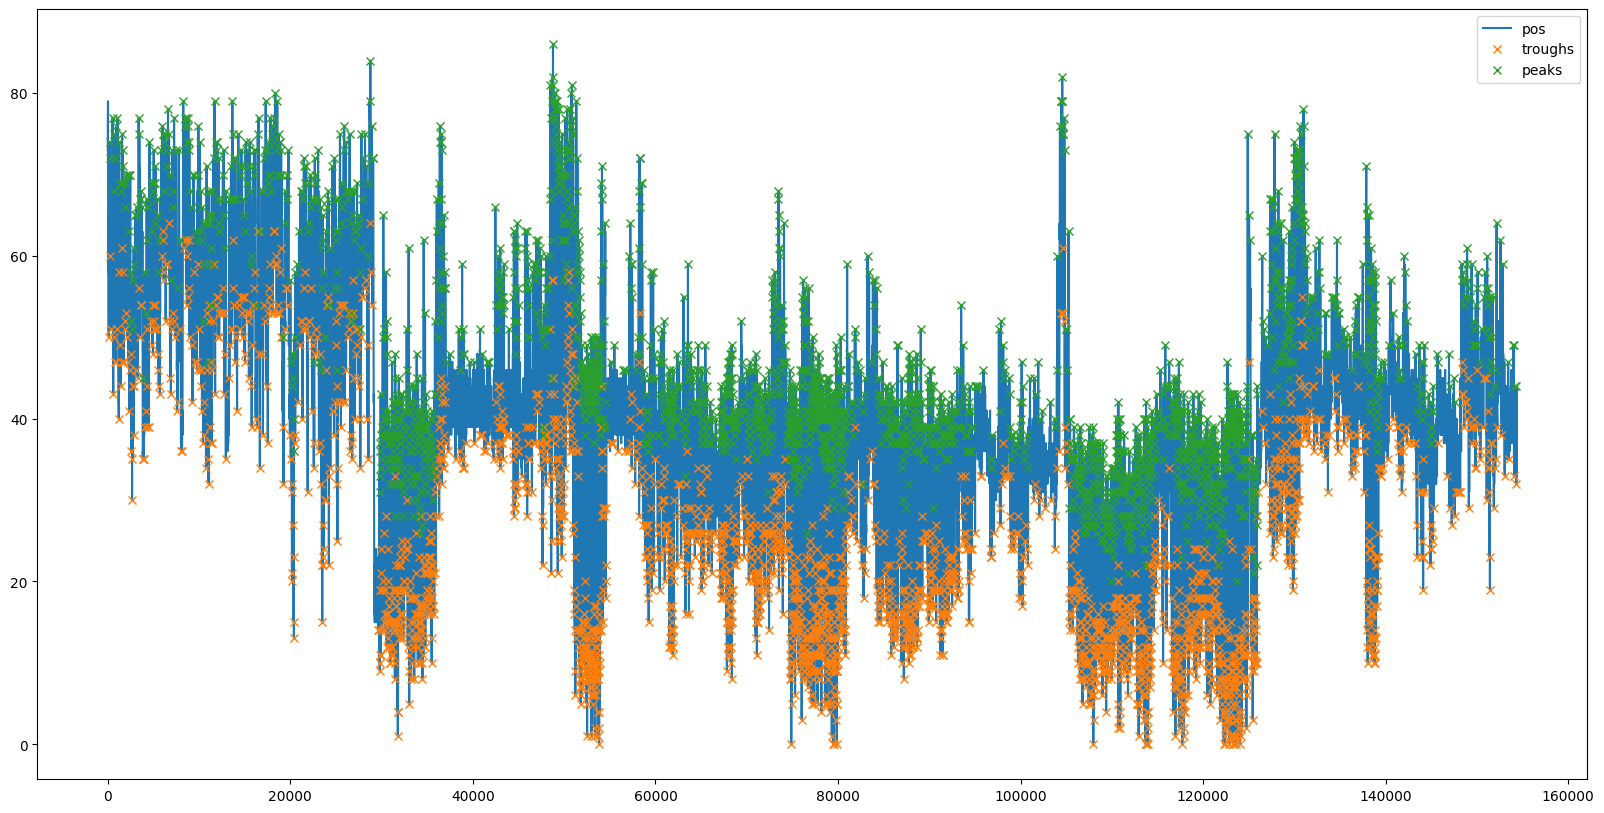

In [8]:

from glob import glob
import os
import json
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

start = 0
finish = -1
distance = 10
prominence = 10

files = glob('predictions/*.funscript')
files = [file for file in files if 'postprocessed' not in file]
file = files[-2]
print(file)
json_data = json.load(open(file))
actions = json_data['actions']
pos = []
ats = []
for action in actions:
    pos.append(action['pos'])
    ats.append(action['at'])
pos = np.array(pos)
ats = np.array(ats)

peaks, _ = find_peaks(pos[start:finish], distance=distance, prominence=prominence)
pos_inverted = 100 - pos
troughs, _ = find_peaks(pos_inverted[start:finish], distance=distance, prominence=prominence)
plt.plot(pos[start:finish])
plt.plot(troughs, pos[troughs], 'x')
plt.plot(peaks, pos[peaks], 'x')
plt.legend(['pos', 'troughs', 'peaks'])
plt.show()

new_json = {'actions': []}
for i in range(len(peaks)):
    new_json['actions'].append({'pos': 100, 'at': int(ats[peaks[i]])})

for i in range(len(troughs)):
    new_json['actions'].append({'pos': 0, 'at': int(ats[troughs[i]])})

new_json['actions'] = sorted(new_json['actions'], key=lambda k: k['at'])
new_json['version'] = 1
new_json['inverted'] = False
new_json['range'] = 100

newfile = file.replace('.funscript', '_postprocessed.funscript') 
with open(newfile, 'w') as outfile:
    json.dump(new_json, outfile, indent=4)